# Descriptive data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
import sys
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
recipes = pd.read_json("/content/drive/MyDrive/Data Scientist/receitas.json")

## General analysis

The data provided has 20130 observations with 11 variables, representing recipes for dishes within a website (apparently), we can interpret this information as:

- directions: Instructions on how to prepare the recipe.
- fat: Amount of fat present in the recipe.
- date: Recipe posting date.
- categories: Categories in which the recipe fits.
- calories: Amount of total calories present in the recipe.
- desc: Additional information about the recipe, like cooking time, etc...
- protein: Quantity in grams of protein present in the recipe.
- rating: Recipe grade, from 0 to 5.
- title: Recipe title.
- ingredients: Description of the ingredients used, including measurement.
- sodium: Amount of sodium present in the recipe.

In [3]:
recipes.shape

(20130, 11)

In [4]:
recipes.head(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


It is seen that there are 5 qualitative variables, 5 quantitative and 1 representing the Date. It is already possible to notice that there is the presence of missing data in some columns.

In [5]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


## Data Cleaning

This step consists of analyzing certain questions in an exploratory analysis. As:

- Are there duplicate observations? That is, for some reason they were registered more than once.
- Is there missing data in my database? If so, what better approach to deal with them?
- Is there the presence of outliers? If so, is it possible to identify them?

We can observe that in fact there are duplicate observations in the database, that is, it is necessary to remove these duplicates leaving only 1 unique record.

In [6]:
recipes[recipes['title'].duplicated(keep = False)].sort_values("title").head(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
20110,[Makes enough spice rub for two whole chickens...,0.0,2013-06-10 04:00:00+00:00,"[Low Fat, Vegetarian, Quick & Easy, Spice, Veg...",16.0,You can use this simple formula to wake up the...,0.0,4.375,4-3-2-1 Spice Rub,"[4 tablespoons kosher salt, 3 tablespoons brow...",2292.0
17404,[Makes enough spice rub for two whole chickens...,0.0,2013-06-10 04:00:00+00:00,"[Low Fat, Vegetarian, Quick & Easy, Spice, Veg...",16.0,You can use this simple formula to wake up the...,0.0,4.375,4-3-2-1 Spice Rub,"[4 tablespoons kosher salt, 3 tablespoons brow...",2292.0
96,[Cook acini di pepe in a pasta pot of boiling ...,8.0,2008-05-12 19:57:03+00:00,"[Garlic, Olive, Pasta, Side, Quick & Easy, Gou...",209.0,Small pasta like acini di pepe and orzo make w...,5.0,4.375,Acini di Pepe Pasta with Garlic and Olives,"[1/2 pound acini di pepe or orzo (1 1/4 cups),...",77.0
5379,[Cook acini di pepe in a pasta pot of boiling ...,8.0,2008-05-12 19:57:03+00:00,"[Garlic, Olive, Pasta, Side, Quick & Easy, Gou...",209.0,Small pasta like acini di pepe and orzo make w...,5.0,4.375,Acini di Pepe Pasta with Garlic and Olives,"[1/2 pound acini di pepe or orzo (1 1/4 cups),...",77.0
2318,"[Heat oven to 350&Deg;F., Soak bread and milk ...",NaN,2009-09-15 04:00:00+00:00,"[Bread, Milk/Cream, Onion, Tomato, turkey, Din...",NaN,None,NaN,4.375,Adobo-Glazed Mini Turkey Loaves,"[1 slice light wheat bread, cut into 1/2-inch ...",NaN


In [7]:
recipes_v1 = recipes.drop_duplicates('title', keep = 'first')

In [8]:
def missing_values(data):
    total = data.isnull().sum()[data.isnull().sum() !=0]
    percent = round((data.isnull().sum()[data.isnull().sum() !=0])/len(data),3)

    return pd.DataFrame({
        'Total':len(data),
        'Total Missing': total,
        'Percentage':percent
    }).sort_values('Percentage', ascending=False)

What we can notice is that both in the title variable and others there is 1 observation without information.

In [9]:
missing_values(data = recipes_v1)

,Total,Total Missing,Percentage
desc,17776,5859,0.330
fat,17776,3732,0.210
protein,17776,3713,0.209
sodium,17776,3689,0.208
calories,17776,3688,0.207
rating,17776,10,0.001
directions,17776,1,0.000
date,17776,1,0.000
categories,17776,1,0.000
title,17776,1,0.000


Observing now, as there is no information between any variable, the most recommended thing is to exclude it from the dataset.

In [10]:
recipes_v1[recipes_v1['title'].isna()]

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
1076,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
recipes_v2 = recipes_v1[~recipes_v1['title'].isna()]

Now, only the numerical and desc variables remain, the **desc** column will be disregarded in the analysis as it is just a text variable that represents the steps for making the recipe, which is not very relevant for the analysis.

In [12]:
missing_values(data = recipes_v2)

,Total,Total Missing,Percentage
desc,17775,5858,0.330
fat,17775,3731,0.210
protein,17775,3712,0.209
calories,17775,3687,0.207
sodium,17775,3688,0.207
rating,17775,9,0.001


Before replacing the missing values of numerical variables, it is interesting to check for outliers, for that I will use an interquartile distance and create upper and lower limits and check if there is a value for each variable that exceeds these limits. Following the same idea of viewing the boxplot individually for each column.

In [13]:
# Identify outliers
def detect_outliers(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_col])
    return outliers

We can see that some recipes had very high values, to resolve this the idea is to treat these outliers by replacing the values with a measure based on the interquantile distance.

In [14]:
outliers = detect_outliers(recipes_v2, ['fat', 'calories', 'protein', 'sodium'])
outliers[['title','fat', 'calories', 'protein', 'sodium']].sort_values("calories", ascending = False).drop_duplicates()

,title,fat,calories,protein,sodium
11444,Pear-Cranberry Mincemeat Lattice Pie,1722763.0,30111218.0,200968.0,27675110.0
6400,Deep-Dish Wild Blueberry Pie,1716279.0,29997918.0,200210.0,27570999.0
19749,"Apricot, Cranberry and Walnut Pie",747374.0,13062948.0,87188.0,12005810.0
2985,Lamb Köfte with Tarator Sauce,44198.0,4518216.0,166471.0,7540990.0
1308,"Rice Pilaf with Lamb, Carrots, and Raisins",221495.0,4157357.0,236489.0,3134853.0
...,...,...,...,...,...
7370,Seriously Simple Seasoning Salt,0.0,6.0,0.0,2386.0
17324,Lockhart Dry Rub,0.0,4.0,0.0,2509.0
19576,Four Seasons Blend,0.0,3.0,0.0,2509.0
1549,Herb Salt,0.0,2.0,0.0,2377.0


In [15]:
# Handle outliers
def clip_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [16]:
recipes_v3 = clip_outliers(recipes_v2, ['fat', 'calories', 'protein', 'sodium'])

It is seen that there is no longer the presence of outliers. This same argument can be observed through boxplot. It is notable to say that now none of the 4 columns had observations that crossed the upper or lower limit.

In [17]:
outliers = detect_outliers(recipes_v3, ['fat', 'calories', 'protein', 'sodium'])
outliers[['title','fat', 'calories', 'protein', 'sodium']].sort_values("calories", ascending = False).drop_duplicates()

,title,fat,calories,protein,sodium


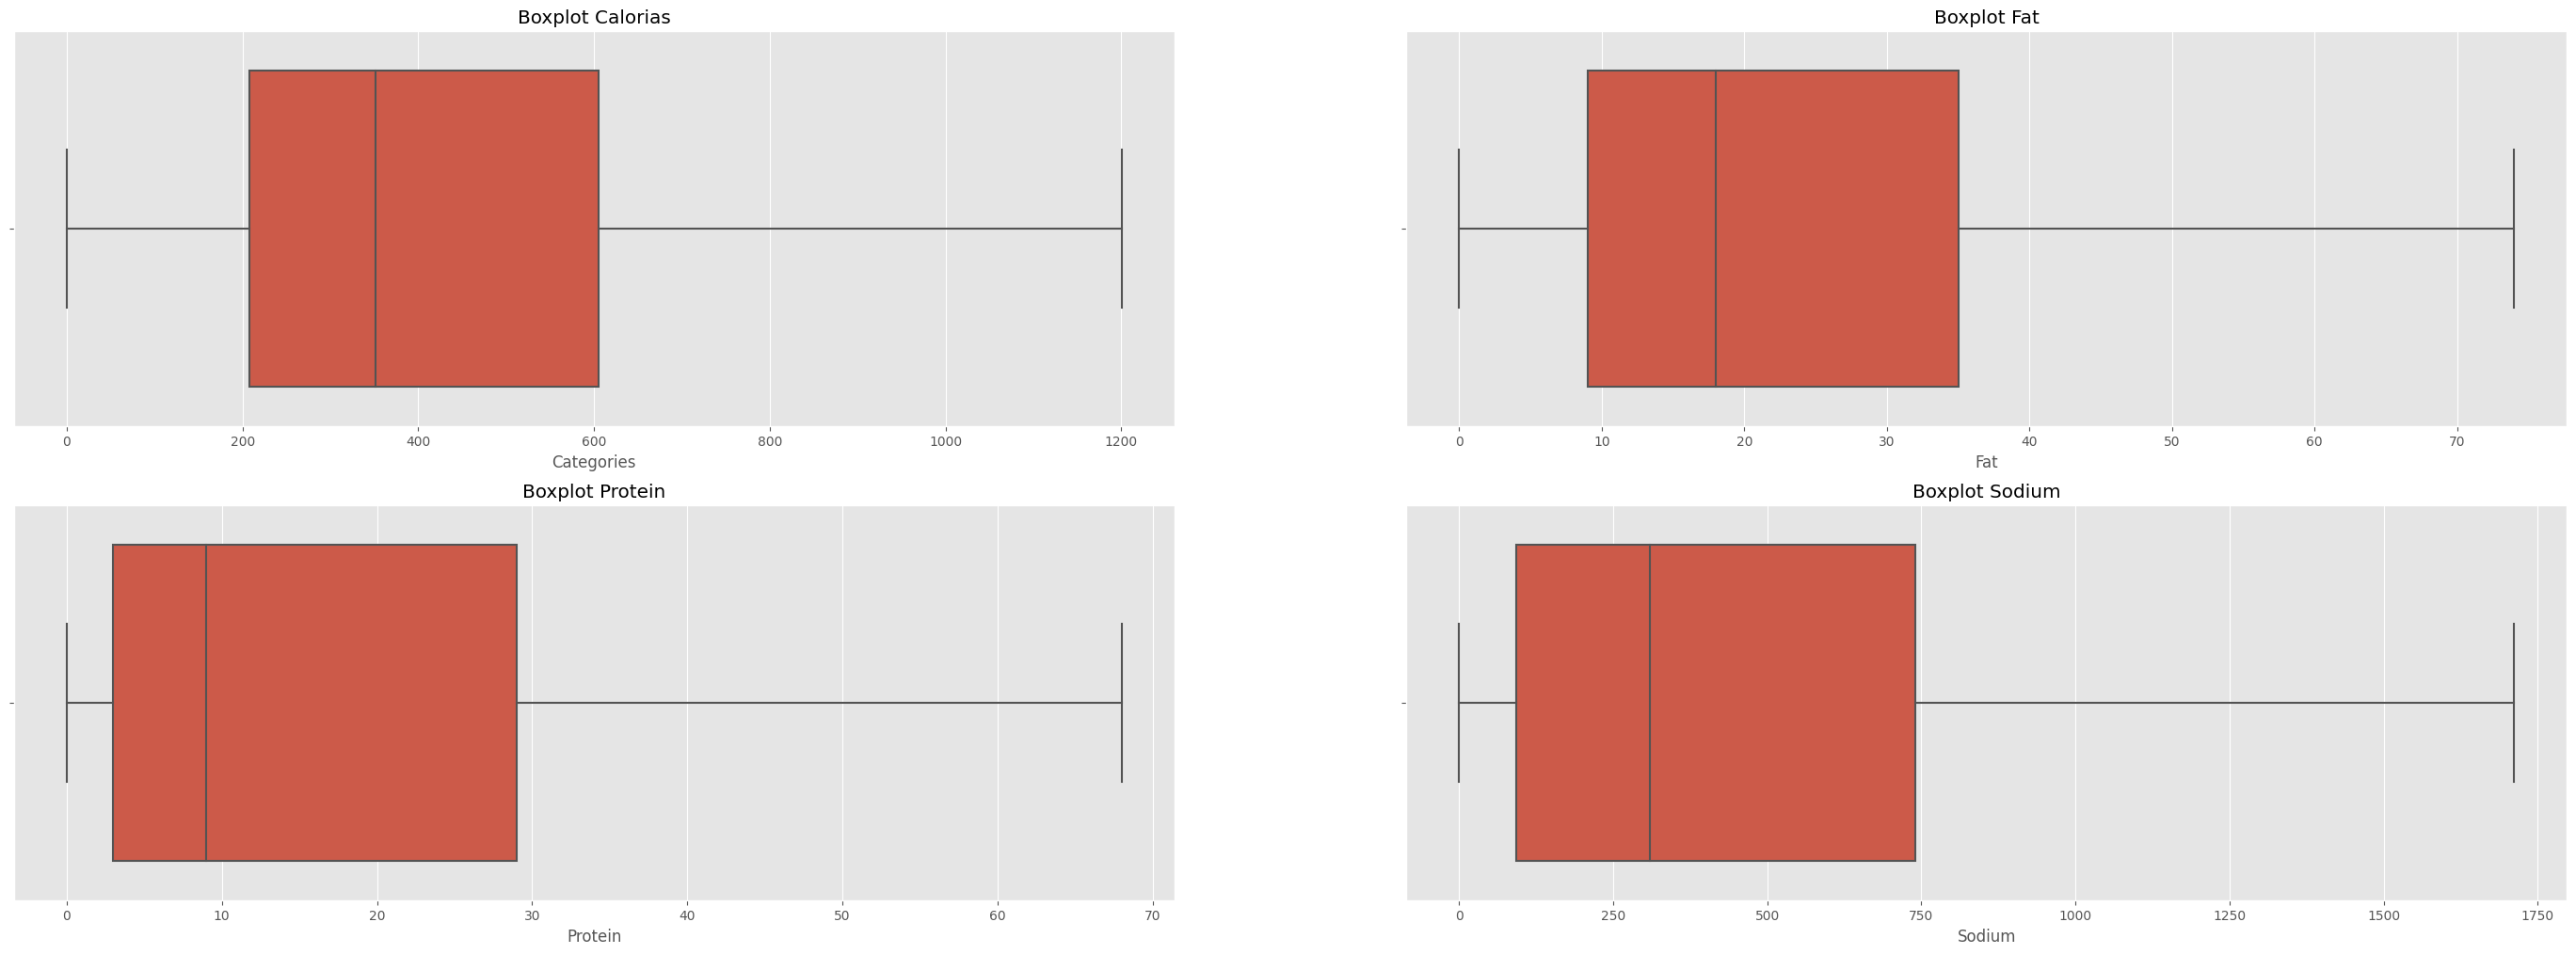

In [18]:
fig = plt.figure(constrained_layout = True, figsize = (35,12))
grid = plt.GridSpec(ncols = 2, nrows = 2)

ax1 = fig.add_subplot(grid[0,0])
ax1 = sns.boxplot(x = 'calories', data = recipes_v3)
ax1.set_title('Boxplot Calorias')
ax1.set_xlabel('Categories')

ax2 = fig.add_subplot(grid[0,1])
ax2 = sns.boxplot(x = 'fat', data = recipes_v3)
ax2.set_title('Boxplot Fat')
ax2.set_xlabel('Fat')

ax3 = fig.add_subplot(grid[1,0])
ax3 = sns.boxplot(x = 'protein', data = recipes_v3)
ax3.set_title('Boxplot Protein')
ax3.set_xlabel('Protein')

ax4 = fig.add_subplot(grid[1,1])
ax4 = sns.boxplot(x = 'sodium', data = recipes_v3)
ax4.set_title('Boxplot Sodium')
ax4.set_xlabel('Sodium')
plt.show()

In addition, we can see from the position of the median that these 4 columns present an asymmetric behavior, indicating a greater concentration for smaller values.

To avoid replacing missing data from numerical variables with the mean, it will be preferable to use the median. Unlike the mean, the median is a more robust measure and is not affected by outliers. Even having controlled for the presence of outliers, it is still preferable to use the median.

In [19]:
numeric_feats = recipes_v3.dtypes[recipes_v3.dtypes == "float64"].index
for col in numeric_feats:
  recipes_v3[col] = recipes_v3[col].transform(lambda x: x.fillna(x.median()))

## Numeric variable analysis

In [20]:
recipes_v3[numeric_feats].describe()

,fat,calories,protein,rating,sodium
count,17775.000000,17775.000000,17775.000000,17775.000000,17775.000000
mean,23.050689,425.521969,16.540422,3.723312,459.401125
std,19.098737,285.205494,18.517970,1.321206,465.170879
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,242.000000,5.000000,3.750000,137.000000
50%,18.000000,351.000000,9.000000,4.375000,310.000000
75%,29.000000,521.000000,21.000000,4.375000,593.000000
max,74.000000,1200.500000,68.000000,5.000000,1712.000000


As previously mentioned, it is notable that these 4 columns present an asymmetry for smaller values, mainly for the **protein** column, in which more than 63% of the recipes have values smaller than 10g of protein.

In [21]:
(recipes_v3[recipes_v3['protein']<= 10].shape[0]/recipes_v3.shape[0])*100

63.48241912798874

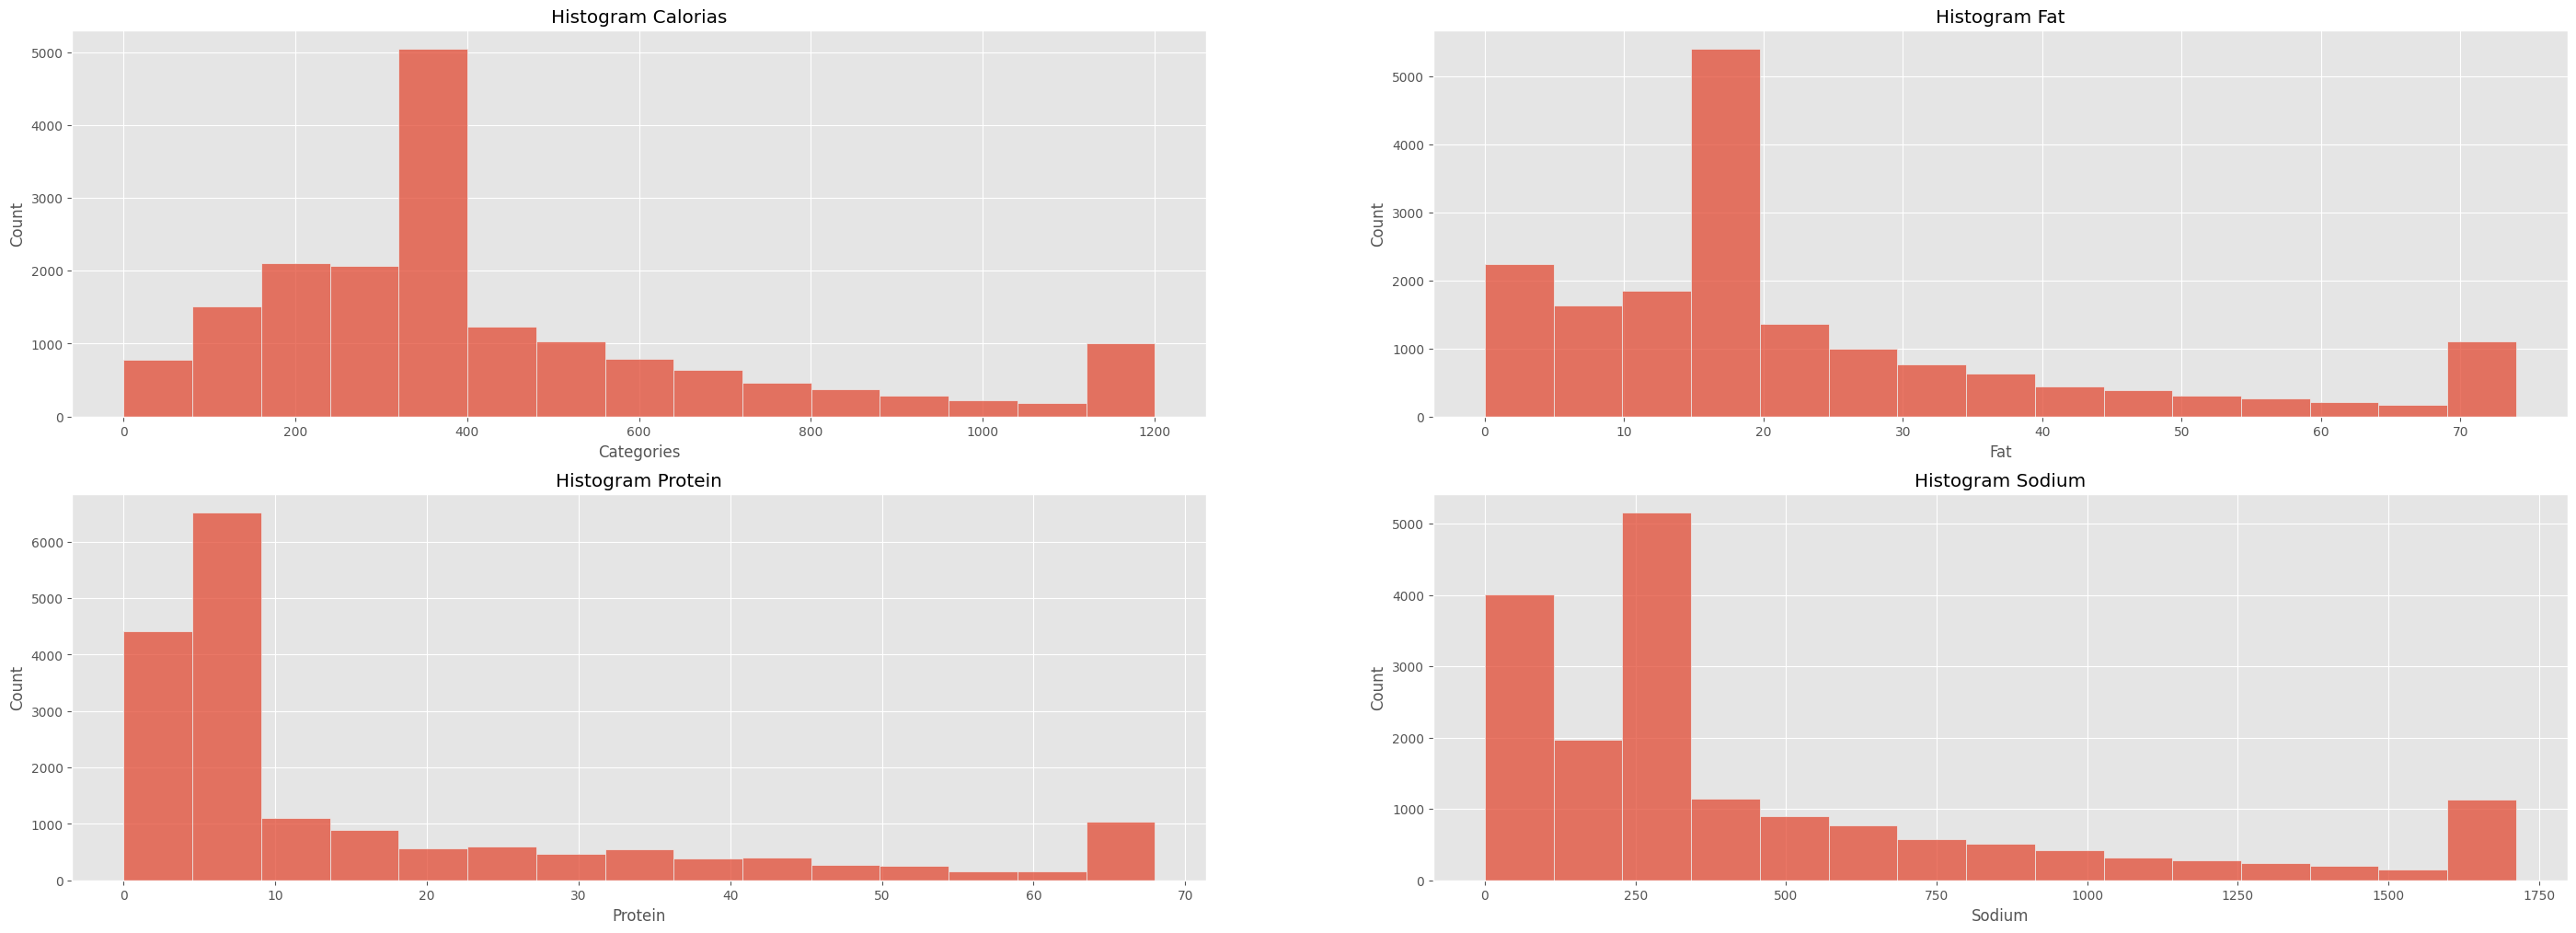

In [22]:
fig = plt.figure(constrained_layout = True, figsize = (35,12))
grid = plt.GridSpec(ncols = 2, nrows = 2)

ax1 = fig.add_subplot(grid[0,0])
ax1 = sns.histplot(x = 'calories', bins = 15, data = recipes_v3)
ax1.set_title('Histogram Calorias')
ax1.set_xlabel('Categories')

ax2 = fig.add_subplot(grid[0,1])
ax2 = sns.histplot(x = 'fat', bins = 15, data = recipes_v3)
ax2.set_title('Histogram Fat')
ax2.set_xlabel('Fat')

ax3 = fig.add_subplot(grid[1,0])
ax3 = sns.histplot(x = 'protein', bins = 15, data = recipes_v3)
ax3.set_title('Histogram Protein')
ax3.set_xlabel('Protein')

ax4 = fig.add_subplot(grid[1,1])
ax4 = sns.histplot(x = 'sodium', bins = 15, data = recipes_v3)
ax4.set_title('Histogram Sodium')
ax4.set_xlabel('Sodium')
plt.show()

Looking at the correlation matrix below, we can see a natural reaction that the increase in fat and protein in the recipe indicates an increase in calories, this is quite reasonable in terms of nutrition. And another interesting thing is the relationship between *sodium* and *calories* that a recipe rich in sodium does not necessarily indicate a recipe with high calories. it is notable to say that the rating does not have a strong correlation with the other variables, that is, a recipe with a high rating does not directly affect the macronutrients.

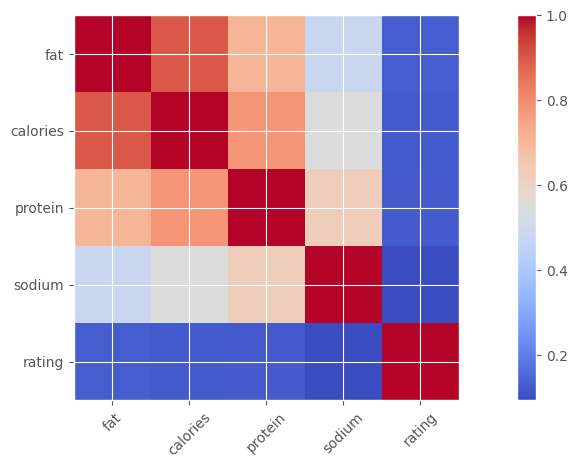

In [23]:
# Matriz de correlação
plt.figure(figsize = (15,5))
correlation_matrix = recipes_v3[['fat', 'calories', 'protein', 'sodium', 'rating']].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

## Analysis of text variables

When it comes to text variables, a lot can be done, initially for the **categories** variable, you can investigate which are the top 10 most frequent categories. Same thing can be done for the **ingredients** column.

We can note that for the categories that appear most in the recipes is *Bon Appétiti*, another interesting fact is that in the 5 most frequent, 4 are related to products with specific food restrictions, such as *Peanut Free*, *Soy Free* , *Tree Nut Free* and *Vegetarian*. Now looking at the **ingredients** column, the graph was not so good, because when it comes to ingredients, there is a factor of the amount used for each ingredient present in the recipe. Because of this, a keyword count in the text needs to be done.

In [24]:
categories_count = recipes_v3['categories'].explode().value_counts().sort_values(ascending=False)[0:11].reset_index()
ingredients_count = recipes_v3['ingredients'].explode().value_counts().sort_values(ascending=False)[0:11].reset_index()

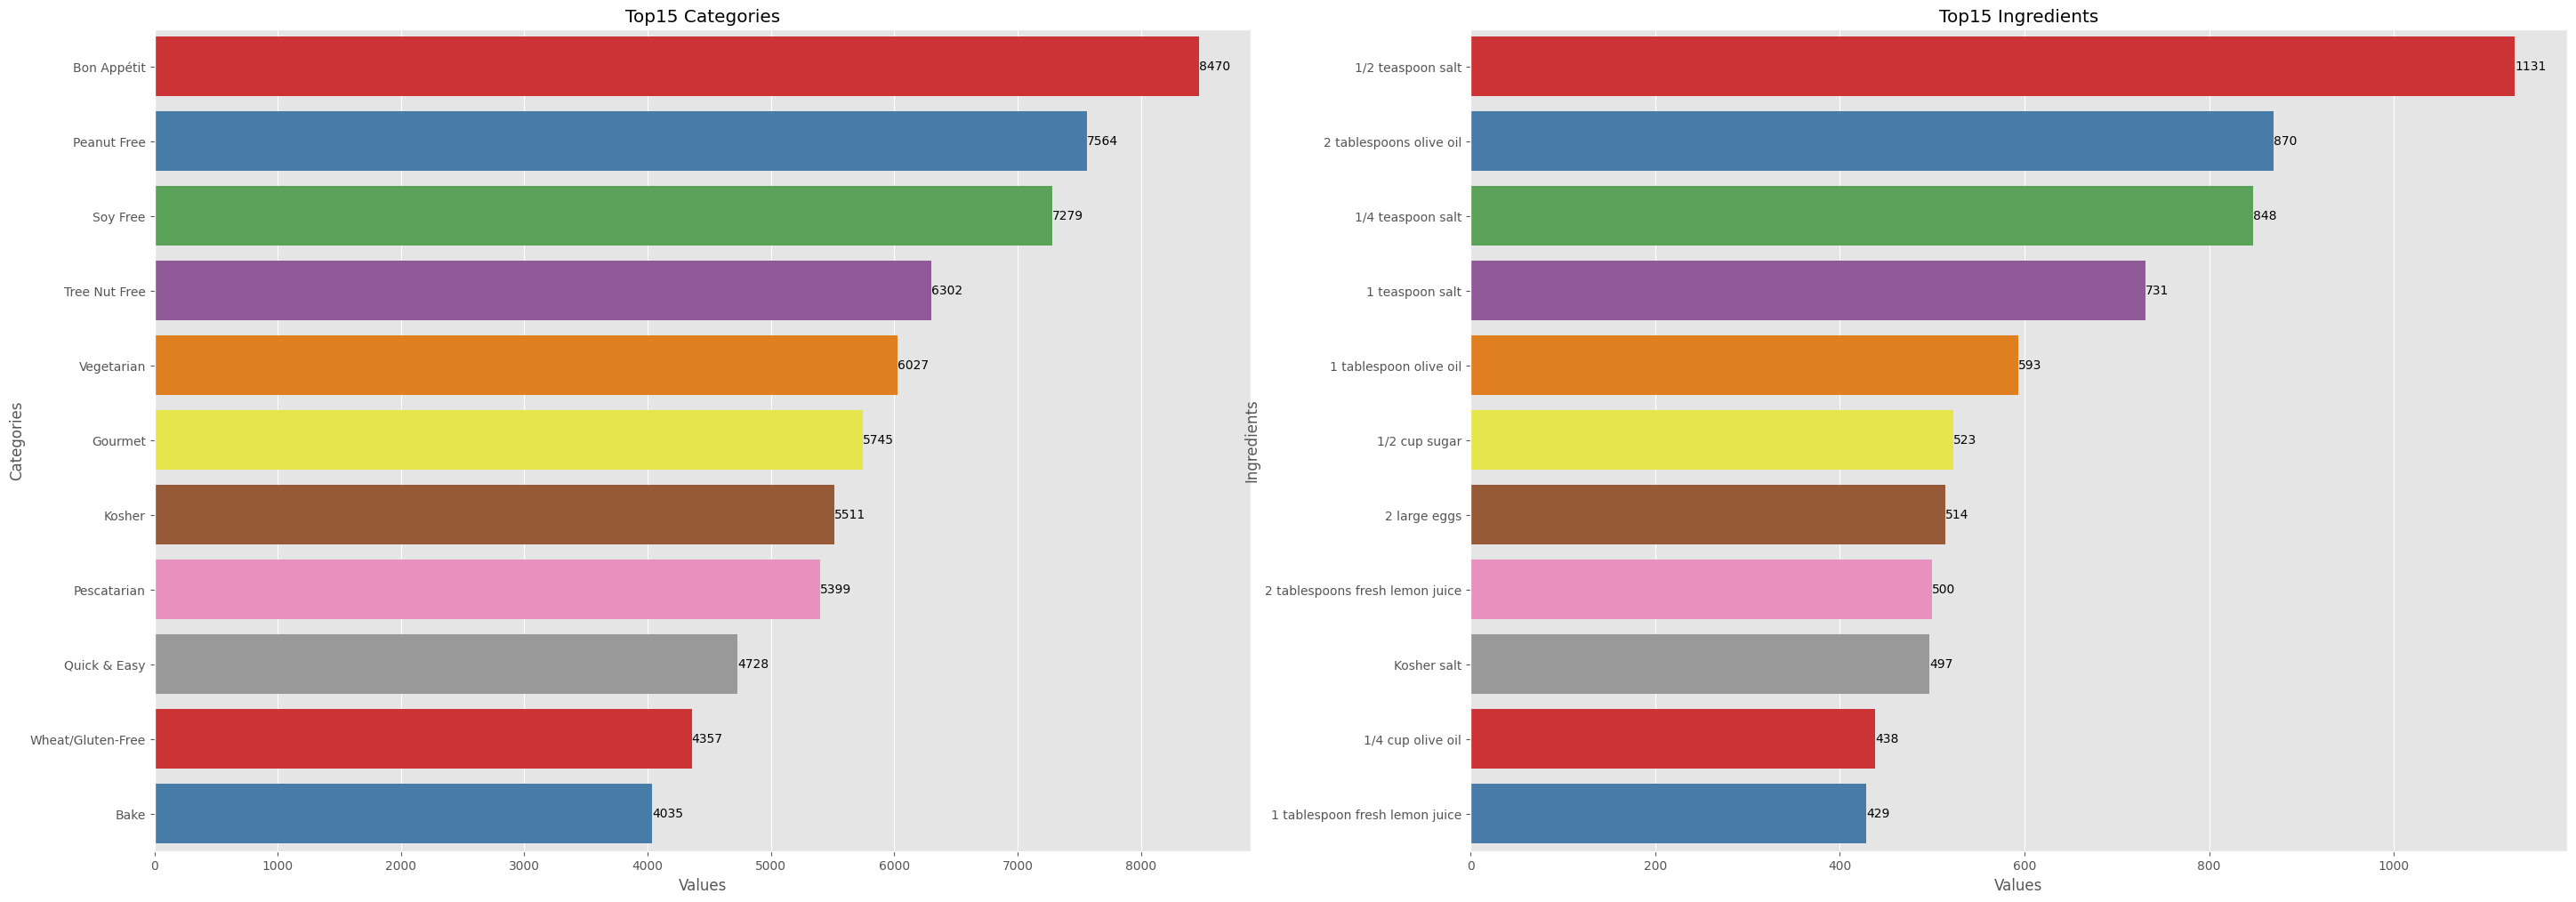

In [25]:
fig = plt.figure(constrained_layout = True, figsize = (35,12))
grid = plt.GridSpec(ncols = 2, nrows = 1)

ax1 = fig.add_subplot(grid[0,0])
ax1 = sns.barplot(x = 'categories', y = 'index', palette = 'Set1',
            data = categories_count,
            orient='h')
ax1.set_title('Top15 Categories')
ax1.set_ylabel('Categories')
ax1.set_xlabel('Values')
ax1.bar_label(ax1.containers[0])


ax2 = fig.add_subplot(grid[0,1])
ax2 = sns.barplot(x = 'ingredients', y = 'index', palette = 'Set1',
            data = ingredients_count,
            orient='h')
ax2.set_title('Top15 Ingredients')
ax2.set_ylabel('Ingredients')
ax2.set_xlabel('Values')
ax2.bar_label(ax2.containers[0])
plt.show()

In [26]:
# Ingredient analysis - frequent keywords
from sklearn.feature_extraction.text import CountVectorizer
ingredients_text = recipes_v3['ingredients'].apply(lambda x: ', '.join(x)).tolist()
vectorizer = CountVectorizer(stop_words='english')
ingredients_matrix = vectorizer.fit_transform(ingredients_text)
counts = pd.DataFrame(ingredients_matrix.toarray(),
                      columns=vectorizer.get_feature_names_out())

Analyzing the keywords in the *ingredients* column, it is possible to notice the presence of measurement units such as *cup*, *tablespoons* and *teaspoon* and also ingredients such as *oil*, *salt*, *sugar*, etc.

In [27]:
np.sum(counts.T.sort_values(by=0, ascending=False), axis=1).sort_values(ascending = False)[0:16]

cup            39209
tablespoons    23009
teaspoon       20602
chopped        18403
fresh          17461
cups           15351
oil            10857
salt           10419
tablespoon     10379
large          10341
teaspoons       8669
inch            8397
sugar           8207
cut             7853
ground          7011
pepper          6833
dtype: int64

## Temporal analysis

It is possible to observe that the year in which it had more recipes was the year 2004, from the year 2010 the amount of recipes remained around 500 - 600 recipes on average. Doing an analysis by month, it is seen that the month with the most registered revenues was the month of August, while the rest had a much smaller amount.

[Text(0, 0, '599'),
 Text(0, 0, '398'),
 Text(0, 0, '653'),
 Text(0, 0, '622'),
 Text(0, 0, '799'),
 Text(0, 0, '630'),
 Text(0, 0, '640'),
 Text(0, 0, '10498'),
 Text(0, 0, '638'),
 Text(0, 0, '1030'),
 Text(0, 0, '720'),
 Text(0, 0, '548')]

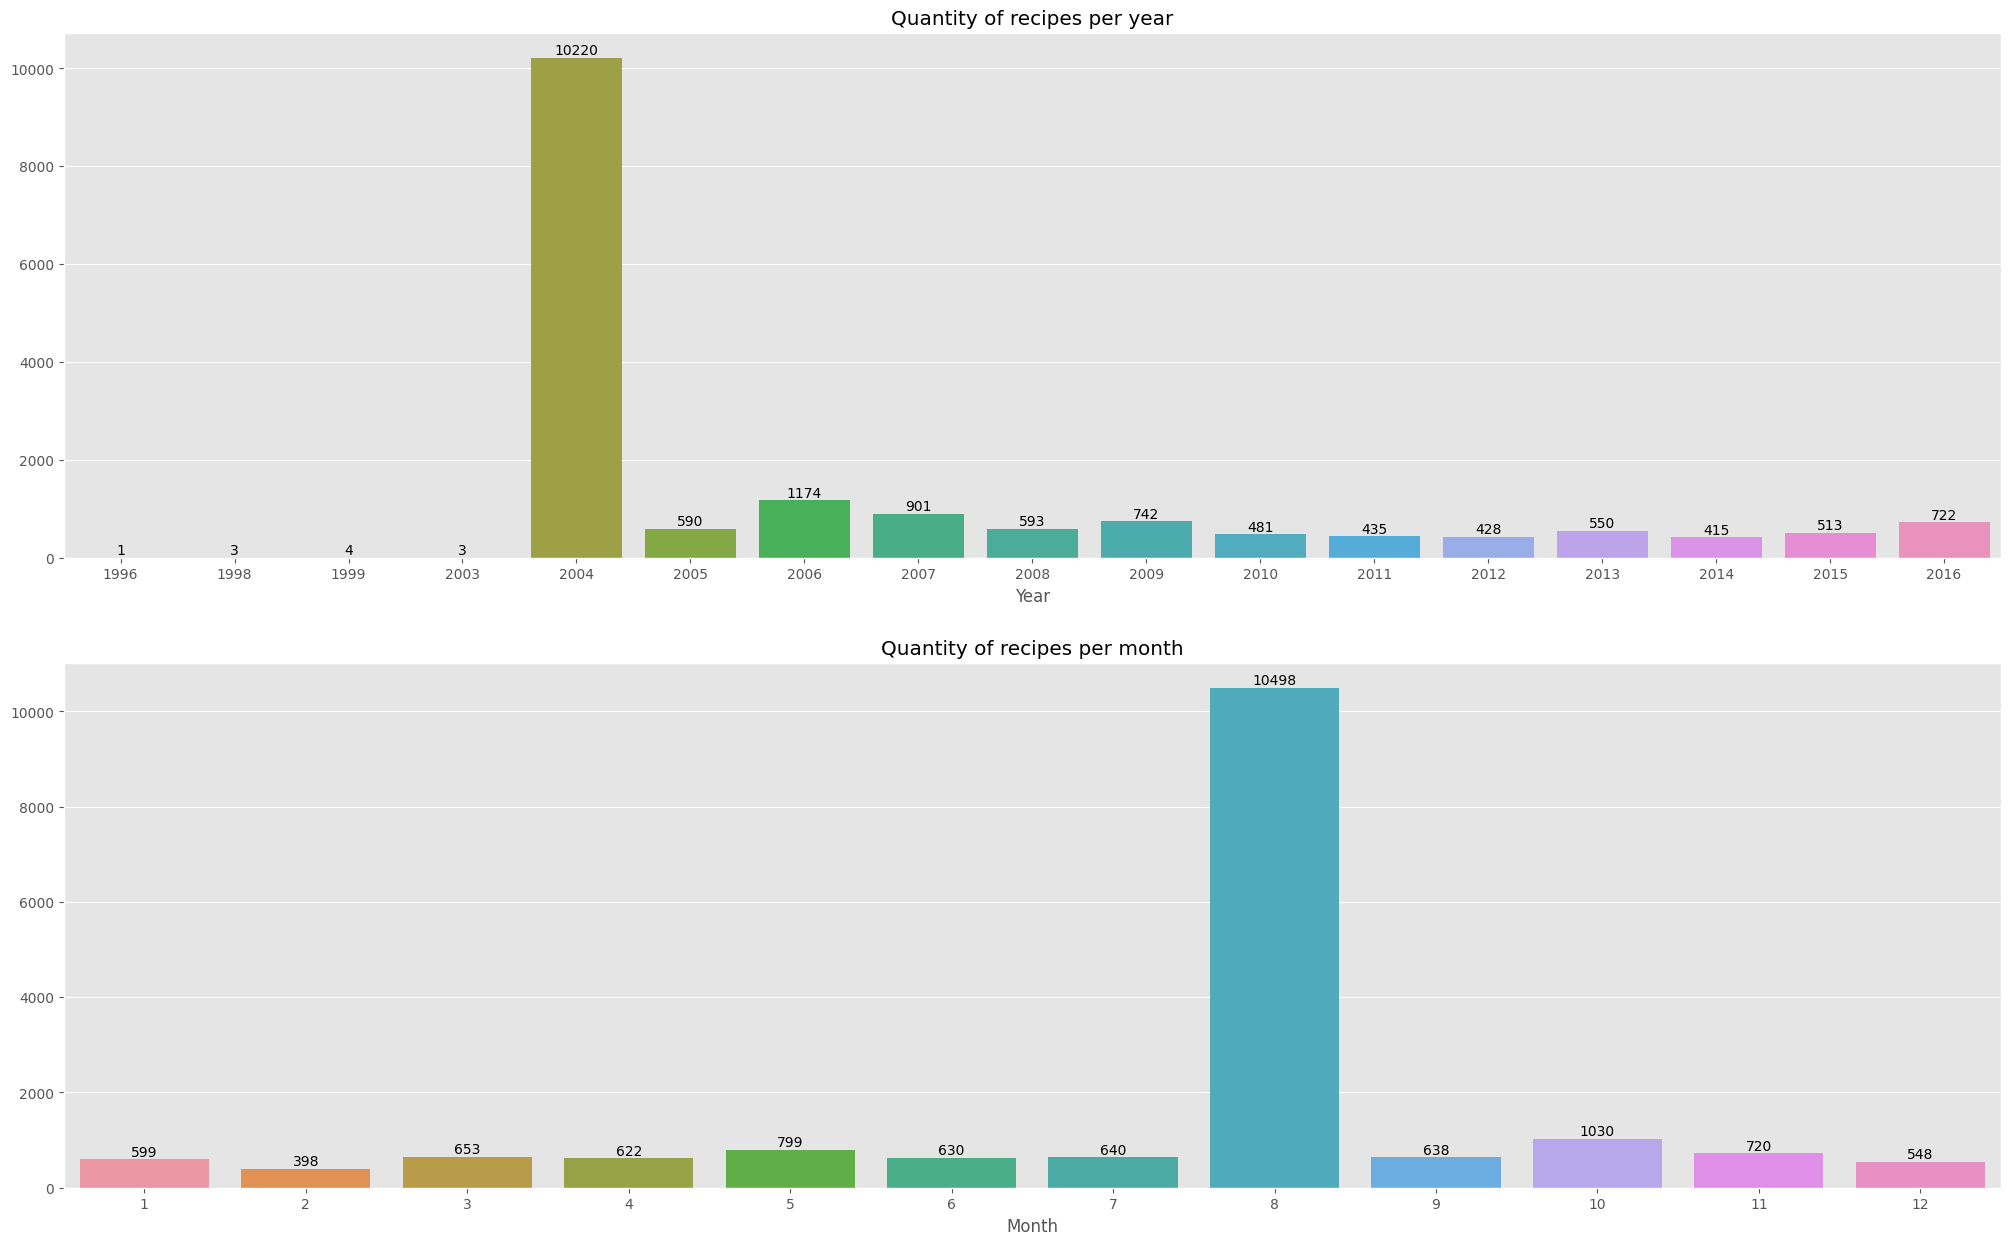

In [28]:
recipes_v3['year'] = recipes_v3['date'].dt.year
recipes_v3['month'] = recipes_v3['date'].dt.month
recipes_by_year = recipes_v3['year'].value_counts().sort_index()
recipes_by_month = recipes_v3['month'].value_counts().sort_index()

fig = plt.figure(constrained_layout = True, figsize = (25,15))
grid = plt.GridSpec(ncols = 1, nrows = 2)

ax1 = fig.add_subplot(grid[0,0])
sns.barplot(x = recipes_by_year.index, y = recipes_by_year.values)
ax1.set_title('Quantity of recipes per year')
ax1.set_xlabel('Year')
ax1.bar_label(ax1.containers[0])

ax2 = fig.add_subplot(grid[1,0])
sns.barplot(x = recipes_by_month.index, y = recipes_by_month.values)
ax2.set_title('Quantity of recipes per month')
ax2.set_xlabel('Month')
ax2.bar_label(ax2.containers[0])

## Test for mean difference

One thing that is interesting to do is to study a difference in means between categories. The top 15 most used categories have already been seen, we can make a comparison by choosing two categories, that is, do the recipes in the *Gourmet* category have higher caloric amounts than the *Vegetarian* ones?
That is, if there is a significant difference.

For this, it was preferable to use a non-parametric **Mann-Whitney** test, due to the asymmetry between the samples. With the *p-value* being extremely low, we can say with a 5% level of significance that the recipes in the *Gourmet* category have higher caloric amounts than the *Vegetarian* in terms of calories.

In [29]:
from scipy.stats import mannwhitneyu

# Choose two categories to compare
category1 = "Gourmet"
category2 = "Vegetarian"
var_interesse = "calories"

# Filter the data for the chosen categories
dados_categoria1 = recipes_v3[recipes_v3['categories'].apply(lambda x: category1 in x)]
dados_categoria2 = recipes_v3[recipes_v3['categories'].apply(lambda x: category2 in x)]

# Extract the relevant columns for analysis (e.g. the 'calories' column to do the comparison)
amostra1 = dados_categoria1[var_interesse].dropna()
amostra2 = dados_categoria2[var_interesse].dropna()

# Perform the Mann-Whitney U test
resultado_u, p_value = mannwhitneyu(amostra1, amostra2, alternative='greater')

# Display the result
print("Result of the Mann-Whitney U test:")
print("Statistic U:", resultado_u)
print("P-value:", p_value)

Result of the Mann-Whitney U test:
Statistic U: 18417090.0
P-value: 9.44634438128047e-10


# Recommendation system


Resultados de tradução
Resultado da tradução
Recommender systems are algorithms used to suggest relevant items or information to a user based on their preferences, interaction history, or similar characteristics of other users. There are several types of recommender systems, each with its own characteristics and approaches.

Here are some of the main types:
  - **Recommender systems based on collaborative filtering**: These systems analyze a user's behavior and preferences and find people with similar tastes. Based on these people's preferences, the system suggests items that the user might like.

- **Content-based recommendation systems:** These systems analyze the characteristics and attributes of recommended items. Based on information about items that the user has liked in the past, the system recommends other items with similar characteristics.

- **Hybrid recommender systems**: These systems combine different approaches, such as collaborative filtering and content-based filtering, to provide more accurate and comprehensive recommendations.

There are other types of recommendation, but I have only cited the main types disseminated in the literature.

## Which model to use for the problem?

For our case, the most recommended is the content-based one, since we do not have information about the user and his activities. To build this model, you will need to use some techniques and measures present in the NLP area.

* Cosine similarity: Cosine similarity is a measure that quantifies the similarity between two vectors in a vector space. Cosine similarity measures the angle between two vectors in vector space. The closer the vectors are to each other, the smaller the angle between them and the greater the cosine similarity. Here is defined the equation of this measure.

$$
\mathrm{sim}_{cos}(A, B) = \frac{{A \cdot B}}{{\|A\| \cdot \|B\|}}
$$

Now the next step is to represent text in numerical form. Some measures are present in the literature, such as the **CountVectorizer** simply counts the frequency of occurrence of each term (word) in a document. It builds a vector that represents each document, where each element of the vector corresponds to a word and the value of the element is the count of that word in the document. On the other hand, **TfidfVectorizer** (Term Frequency-Inverse Document Frequency) assigns a weight to each term based on its frequency of occurrence in the document and its rarity in the *corpus* as a whole, remembering that a *corpus * is a collection of text or audio organized into datasets. Therefore, **TfidfVectorizer** tends to produce more discriminating vector representations compared to CountVectorizer.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
df = recipes_v3.copy()

Before that, it is necessary to clean the data to apply the model. A new variable called **tags** will be created, being the union of the columns **categories** and **ingredients**, so that the model can capture keywords both related to the category of the recipe and the ingredients used. And it will default to putting all text as lowercase and removing spaces.

In [32]:
def clean_text(var):
    result = str(var).lower()
    return(result.replace(' ',''))

In [33]:
df['categories'] = df['categories'].apply(clean_text)
df['ingredients'] = df['ingredients'].apply(clean_text)

In [34]:
df['tags'] = df['categories'].astype(str) + df['ingredients'].astype(str)
df['tags'] = df['tags'].apply(lambda x: ' '.join(x.split()))

df = df[['title', 'categories', 'ingredients' ,'tags']]
df = df.dropna()

In [35]:
df.head(5)

,title,categories,ingredients,tags
0,"Lentil, Apple, and Turkey Wrap","['sandwich','bean','fruit','tomato','turkey','...","['4cupslow-sodiumvegetableorchickenstock','1cu...","['sandwich','bean','fruit','tomato','turkey','..."
1,Boudin Blanc Terrine with Red Onion Confit,"['foodprocessor','onion','pork','bake','bastil...","['11/2cupswhippingcream','2mediumonions,choppe...","['foodprocessor','onion','pork','bake','bastil..."
2,Potato and Fennel Soup Hodge,"['soup/stew','dairy','potato','vegetable','fen...","['1fennelbulb(sometimescalledanise),stalksdisc...","['soup/stew','dairy','potato','vegetable','fen..."
3,Mahi-Mahi in Tomato Olive Sauce,"['fish','olive','tomato','sauté','lowfat','low...","['2tablespoonsextra-virginoliveoil','1cupchopp...","['fish','olive','tomato','sauté','lowfat','low..."
4,Spinach Noodle Casserole,"['cheese','dairy','pasta','vegetable','side','...","['112-ouncepackagefrozenspinachsoufflé,thawed'...","['cheese','dairy','pasta','vegetable','side','..."


A function was created that will receive the database and the tags provided by the client, this function performs the following steps:

- 1° Vectorizes the recipe tags using *TfidfVectorizer()*
- 2° Transforming the input text into the same format that was defined by the dataframe.
- 3° Vectorizes the tags provided by the customer.
- 4° Calculates the similarity between the recipe tags and the customer's tags, using cosine similarity.
- 5° Obtain the indexes of the most similar recipes, sorting them.
- 6° Get recommended recipes and scores.

In [36]:
def recommend_recipes(df, client_tags, top_n=5, type = "tfidf"):
    # Vectorizing recipe tags
    if (type == 'tfidf'):
      counter = TfidfVectorizer(stop_words="english")
    elif (type == 'counter'):
      counter = CountVectorizer(stop_words="english")
    else:
      sys.exit("Não existe essa opção")

    tag_matrix = counter.fit_transform(df['tags'])

    # Transforming the input text into the same format as the dataframe
    client_tags = clean_text(client_tags)
    # Vectorizing customer-supplied tags
    client_vector = counter.transform([client_tags])

    # Calculating similarity between recipe tags and customer tags
    similarity_scores = cosine_similarity(client_vector, tag_matrix)

    # Getting the indexes of the most similar recipes
    top_indices = similarity_scores.flatten().argsort()[-top_n:][::-1]

    # Resetting the original DataFrame index
    df.reset_index(drop=True, inplace=True)

    # Getting recommended recipes and scores
    recommended_recipes = df.loc[top_indices, 'title'].tolist()
    tags = df.loc[top_indices, 'tags'].tolist()
    scores = similarity_scores.flatten()[top_indices]

    results = pd.DataFrame({"Recipes":recommended_recipes,
                            "Tags":tags , "Score":scores})
    return results

In [37]:
# Example of recommendation for the first customer
client_tags = ['Sandwich', 'Bean', 'Turkey', 'Fruit', 'Tomato']
results = recommend_recipes(df, client_tags, type = "tfidf")
print("Cliente 1:")
results

Cliente 1:


,Recipes,Tags,Score
0,To Quick-Soak Dried Beans,"['bean','side','quick&easy','gourmet']['n/an/a']",0.361755
1,To Quick-Soak Dried Black-Eyed Peas,"['bean','quick&easy','winter','gourmet']['n/a']",0.326184
2,"Lentil, Apple, and Turkey Wrap","['sandwich','bean','fruit','tomato','turkey','...",0.208585
3,Turkey Panino with Cranberry Sauce,"['sandwich','turkey','thanksgiving','quick&eas...",0.204344
4,Turkey Burgers,"['sandwich','olive','tomato','turkey','quick&e...",0.196361


In [38]:
# Example of recommendation for the second customer
client_tags = ['Pork', 'Onion', 'Bake', 'Gourmet', 'French']
results = recommend_recipes(df, client_tags, type = "tfidf")
print("\nCliente 2:")
results


Cliente 2:


,Recipes,Tags,Score
0,To Prepare a Water Bath for Baking,"['bake','gourmet'][]",0.536918
1,Grilled Italian Sausages,"['beef','pork','summer','house&garden'][]",0.286019
2,To Warm Tortillas,"['bake','tortillas','gourmet'][]",0.264132
3,Kebabs,"['beef','lamb','pork','marinate','summer','hou...",0.231813
4,Smoked Pork Chops with Onion-and-Cider Glaze,"['fruit','onion','pork','apple','gourmet']['4(...",0.217803


In [39]:
# Example of recommendation for the third customer
client_tags = ['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat']
results = recommend_recipes(df, client_tags, type = "tfidf")
print("\nCliente 3:")
results


Cliente 3:


,Recipes,Tags,Score
0,Zucchini and Olive Mashed Potatoes,"['garlic','olive','potato','tomato','vegetable...",0.252910
1,Mahi-Mahi in Tomato Olive Sauce,"['fish','olive','tomato','sauté','lowfat','low...",0.229408
2,Hoffman House (or Astoria),"['bitters','gin','alcoholic','olive','cocktail...",0.217563
3,"Halibut Steamed with Oranges, Tomatoes, and Ol...","['citrus','fish','garlic','olive','tomato','sa...",0.211025
4,Highland Fling,"['bitters','olive','cocktail','whiskey','house...",0.205931
